In [196]:
# import libraries 

import pandas as pd 
import numpy as np 
import category_encoders as ce
import seaborn as sns


Exercise: Using the data in scout_data, build a model to predict a product tier(Classification) and a model to predict the number of detail views.(Regression)

In [197]:
# load data 


df = pd.read_csv('./data/scout_data/Case_Study_Data.csv', delimiter=';')    
df

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224
...,...,...,...,...,...,...,...,...,...,...,...,...
78316,348704581,Basic,Lexus,15740,8,2014,12.07.18,19.10.18,6895.0,230.0,99,0.03335750543872371
78317,359231940,Basic,Hyundai,2950,6,2006,28.09.18,23.10.18,1175.0,16.0,25,0.012936170212765956
78318,362425932,Basic,Volkswagen,7850,8,2014,04.11.18,21.11.18,448.0,21.0,16,0.046875
78319,357164227,Basic,Toyota,13945,5,2011,04.09.18,02.10.18,1617.0,29.0,28,0.017934446505875078


# Data Xplore and data cleaning 


In [198]:
df.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,7.832100e+04,78321.000000,78321.000000,78321.000000,78311.000000,78311.000000,78321.000000
mean,3.574869e+08,15067.655316,4.632117,2011.089465,2297.502522,93.469870,35.986262
std,5.076572e+06,16374.497606,2.354275,6.538395,6339.034423,228.025588,32.214835
min,3.472324e+08,1.000000,1.000000,1924.000000,0.000000,0.000000,-3.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000
50%,3.585480e+08,10900.000000,5.000000,2013.000000,920.000000,36.000000,25.000000
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000
max,3.647040e+08,249888.000000,9.000000,2106.000000,608754.000000,13926.000000,127.000000


In [199]:
df.shape

(78321, 12)

In [200]:
df.isnull().sum()

article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64

* column name;description
* article_id;unique article identifier
* product_tier;premium status of the article
* make_name;name of the car manufacturer
* price;price of the article
* first_zip_digit;first digit of the zip code of the region the article is offered in
* first_registration_year;year of the first registration of the article
* created_date;creation date of the listing
* deleted_date;deletion date of the listing
* search_views;number of times the article has been shown as a search result
* detail_views;number of times the article has been clicked on
* stock_days;Time in days between the creation of the listing and the deletion of the listing
* ctr;Click through rate calculated as the quotient of detail_views over search_views

In [201]:
# not so many missing values, so we can drop them
df.dropna(inplace=True)   

In [202]:
# no duplicates 
df.duplicated().sum()

np.int64(0)

In [203]:
# lets check the data types of the columns

df.dtypes

article_id                   int64
product_tier                object
make_name                   object
price                        int64
first_zip_digit              int64
first_registration_year      int64
created_date                object
deleted_date                object
search_views               float64
detail_views               float64
stock_days                   int64
ctr                         object
dtype: object

In [204]:
# build the ctr : 

df["Conversion Rate"] = df["detail_views"] / df["search_views"] * 100

There are several key points from the data . 

article id has probably no additional value , unless one knows what it means . 

nummerical data are : 
price, first registeration year , search views , detail views , stock days , ctr (this is how many times was the article clicked on when it was shown)

and categorical data are : 

product tier , make name , first zip digit , 

date time data : this needs to be processed , maybe extract year and month of the created 


# start with a simple model : 

# select important columns

In [205]:
nummerical_features = df.select_dtypes(include=["number"])

categorical_features = df.select_dtypes(include=["object"])

In [206]:
nummerical_features.drop(columns=['article_id','first_zip_digit'], inplace=True)

In [207]:
nummerical_features  = nummerical_features.columns.tolist()

In [208]:
categorical_features.drop(columns=['created_date',"deleted_date","ctr"], inplace=True)


In [209]:
categorical_features = categorical_features.columns.tolist()


In [210]:
categorical_features.extend(['first_zip_digit'])

In [211]:
nummerical_features

['price',
 'first_registration_year',
 'search_views',
 'detail_views',
 'stock_days',
 'Conversion Rate']

In [212]:
print(categorical_features)

['product_tier', 'make_name', 'first_zip_digit']


In [213]:
# lets check the unique values of the categorical features

for col in categorical_features:
    print(f'{col} : {df[col].nunique()} unique values')
    

product_tier : 3 unique values
make_name : 91 unique values
first_zip_digit : 9 unique values


In [214]:
# encoding the categorical features

# product tier and is ordinal features, so we can use label encoding

ce_ord = ce.OrdinalEncoder(cols=['product_tier'], return_df=True)

df = ce_ord.fit_transform(df)




# for make_name , its best to use baseN encoding since it has many unique values

ce_baseN = ce.BaseNEncoder(cols=['make_name', 'first_zip_digit'], return_df=True , base  = 3)

df = ce_baseN.fit_transform(df)



In [215]:
df.columns

Index(['article_id', 'product_tier', 'make_name_0', 'make_name_1',
       'make_name_2', 'make_name_3', 'make_name_4', 'price',
       'first_zip_digit_0', 'first_zip_digit_1', 'first_zip_digit_2',
       'first_registration_year', 'created_date', 'deleted_date',
       'search_views', 'detail_views', 'stock_days', 'ctr', 'Conversion Rate'],
      dtype='object')

<Axes: >

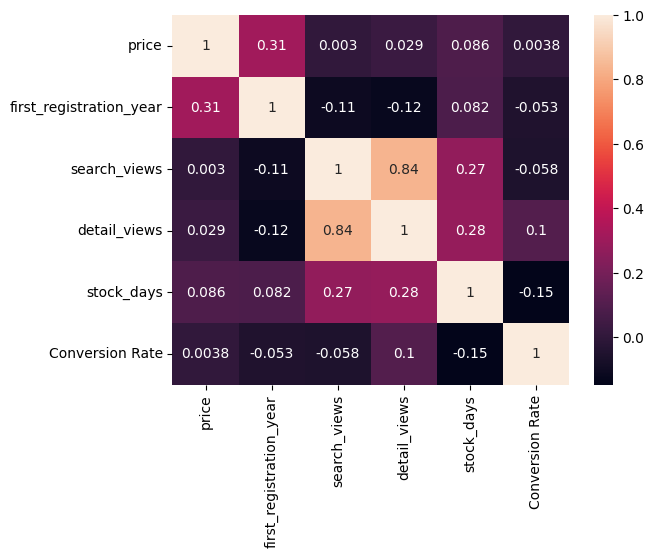

In [216]:
# lets check the correlation between the nummerical features and plot it 

sns.heatmap(df[nummerical_features].corr(), annot=True)

In [217]:
# between detail views and search views, there is a strong correlation, so we can drop one of them
# but bare in mind that the regression objective is to find detail views , so we can keep search views 


In [193]:
df.columns.tolist()

['article_id',
 'product_tier',
 'make_name_0',
 'make_name_1',
 'make_name_2',
 'make_name_3',
 'make_name_4',
 'price',
 'first_zip_digit_0',
 'first_zip_digit_1',
 'first_zip_digit_2',
 'first_registration_year',
 'created_date',
 'deleted_date',
 'search_views',
 'detail_views',
 'stock_days',
 'ctr',
 'Conversion Rate']

In [218]:
# there is no strong correlation between the features
# letst check the importance of the categorical features using mutual information

from sklearn.feature_selection import mutual_info_regression

encoded_categorical_features = ['product_tier',
 'make_name_0',
 'make_name_1',
 'make_name_2',
 'make_name_3',
 'make_name_4','first_zip_digit_0',
 'first_zip_digit_1',
 'first_zip_digit_2',]

X = df[encoded_categorical_features]
y = df['detail_views']

mi = mutual_info_regression(X, y)

# now print the importance of the features

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)




product_tier         0.031337
first_zip_digit_2    0.002507
make_name_3          0.002427
make_name_4          0.002086
make_name_1          0.001721
first_zip_digit_1    0.001698
make_name_0          0.000000
make_name_2          0.000000
first_zip_digit_0    0.000000
dtype: float64

# lets train a model now for classification problem : 


In [221]:
# the tearget in classification problem is to predict the product tier, so we can drop the detail views and keep the search views

X = df[encoded_categorical_features + nummerical_features].drop("product_tier", axis=1)
y = df['product_tier']

# lets split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lets use random forrest classifier to predict the product tier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

# f1 score 

from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='weighted'))

# print accuracy

print(accuracy_score(y_test, y_pred))


# lets check other metricsof the model

from sklearn.metrics import classification_report

#print(classification_report(y_test, y_pred))

# lets check the importance of the features




0.962925522908238
0.9706257982120051


In [229]:
# lets do the regression to predict the detail views

X = df[encoded_categorical_features + nummerical_features].drop("detail_views", axis=1)
y = df['detail_views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use reandom forrest regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# what is the mean absolute error

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

# also check the r2 score 

from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))



1.8677892720306515
0.9088831718060483


In [231]:
# lets use linear regression to predict the detail views    

from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

print(r2_score(y_test, y_pred))




36.85813983514158
0.7589824640122811


In [ ]:
# lets use less columns, 
# lets ommit make name 

X = X.drop(columns=['make_name_0','make_name_1','make_name_2','make_name_3','make_name_4'])


In [234]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use reandom forrest regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# what is the mean absolute error

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

# also check the r2 score 

from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))



1.8721992337164752
0.9062615863988803


In [224]:
y

0        123.0
1        223.0
2        265.0
3         26.0
4         20.0
         ...  
78316    230.0
78317     16.0
78318     21.0
78319     29.0
78320      2.0
Name: detail_views, Length: 78297, dtype: float64